## Distributions within shapes

The distribution generation functions - for instance, `ms.distribution.kernel_density_estimation` or `ms.distribution.generate_distribution` - also play nicely with MuSpAn's standard `boundaries` keywords. To see this in action, let's load in the `Macrophage-Hypoxia-ROI` dataset and look at the density of macrophages in the tumour.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Example ROI from Pugh/Macklin H&N cancer hypoxia data
Number of objects: 1163
Collections: ['Macrophages', 'Pimo', 'PanCK', 'CAIX', 'Simplified boundaries']
Labels: [] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

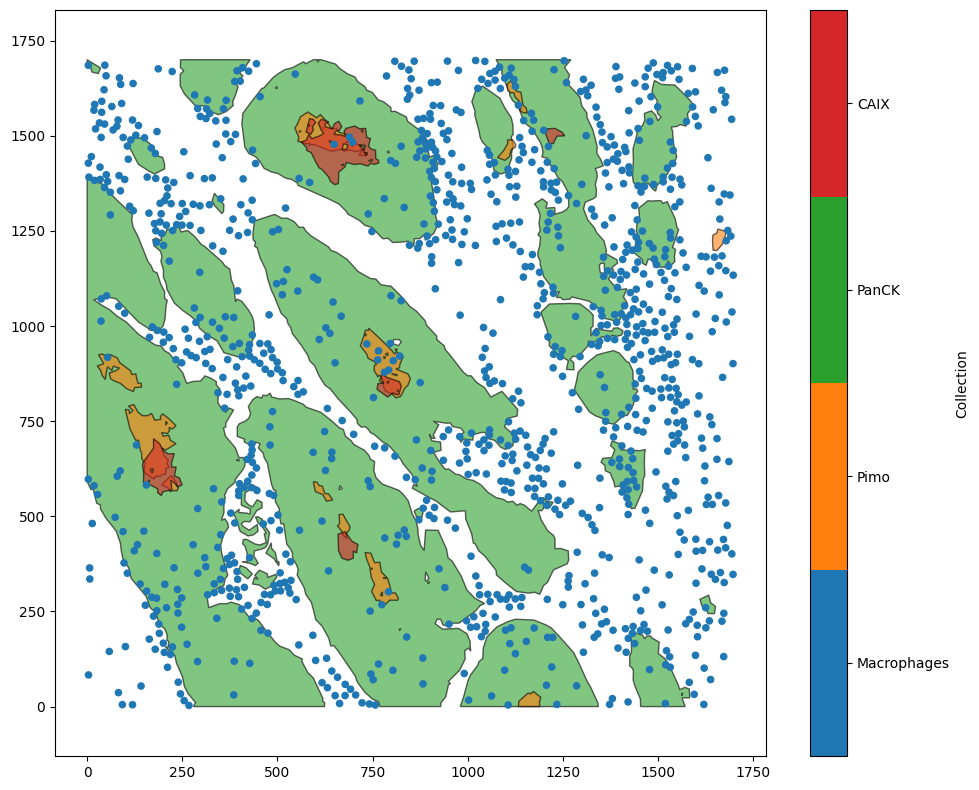

In [1]:
# Import necessary libraries for analysis
import muspan as ms 
import matplotlib.pyplot as plt

# Load the example domain dataset
domain = ms.datasets.load_example_domain('Macrophage-Hypoxia-ROI')

# Visualise the loaded domain
ms.visualise.visualise(domain)

First, let's see what the kernel density estimation (KDE) looks like, to plot the macrophage distribution across the whole ROI.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

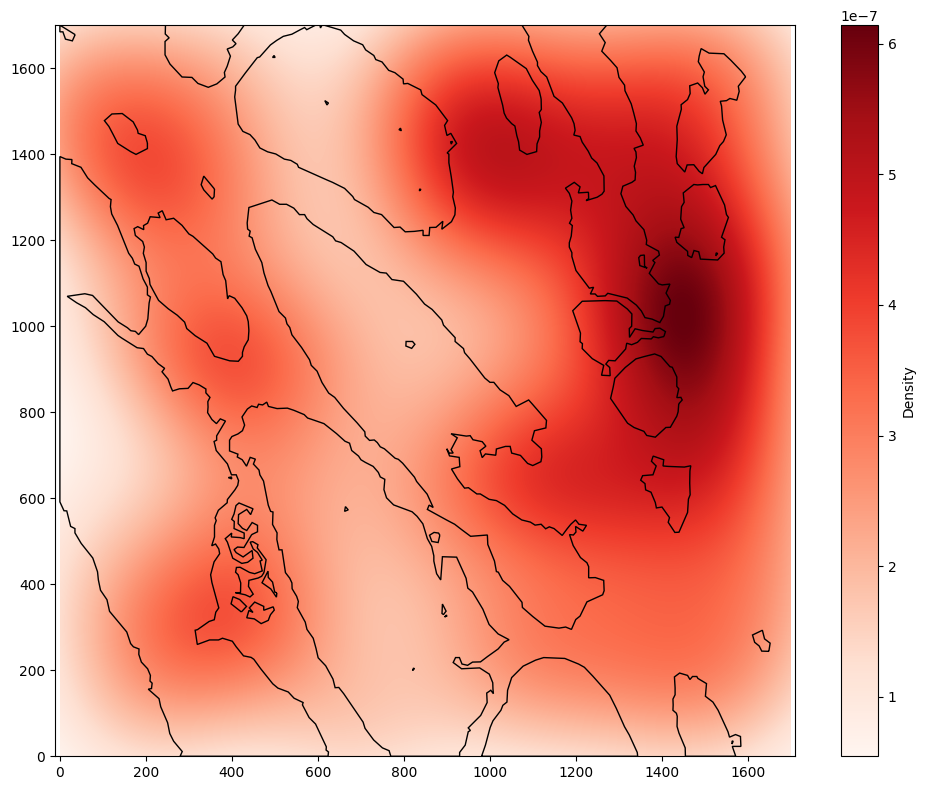

In [2]:
# Calculate the KDE for all macrophages across the entire domain
kde_all = ms.distribution.kernel_density_estimation(
    domain,
    population=('Collection', 'Macrophages'),
    mesh_step=5,
    visualise_output=True
)

# Plot the outlines of the PanCK boundaries
ms.visualise.visualise(domain, objects_to_plot=('Collection','PanCK'),ax=plt.gca(),shape_kwargs={'edgecolor':'k','fill':False,'alpha':1,'lw':1},add_cbar=False)

When we don't take into account the tumour/stroma boundary, we can see that most of the density of macrophages is in the top right of the ROI. However, using the `include_boundaries` argument shows that the tumour island with the highest density of macrophages is actually towards the bottom left of the ROI. Instead, the overall distribution is heavily skewed by the macrophages in the stroma, which we can see using the `exclude_boundaries` keyword.

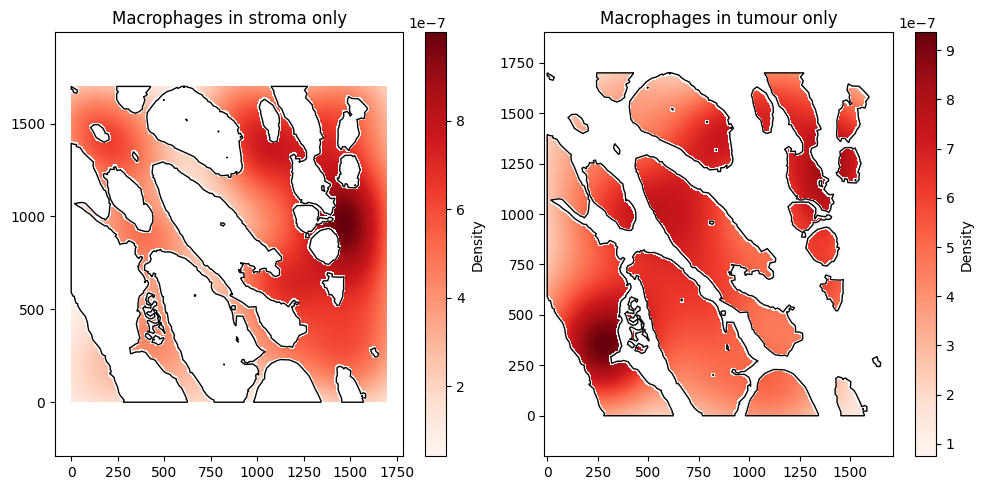

In [3]:
# Calculate the KDE for macrophages outside of the tumour boundaries
kde_stroma = ms.distribution.kernel_density_estimation(
    domain,
    population=('Collection', 'Macrophages'),
    exclude_boundaries=('Collection', 'PanCK'),
    mesh_step=5
)

# Calculate the KDE for macrophages within the tumour boundaries
kde_tumour = ms.distribution.kernel_density_estimation(
    domain,
    population=('Collection', 'Macrophages'),
    include_boundaries=('Collection', 'PanCK'),
    mesh_step=5
)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Visualise the KDE for all macrophages
ms.visualise.visualise_heatmap(domain, kde_stroma, ax=axes[0])
axes[0].set_title('Macrophages in stroma only')

# Visualise the KDE for macrophages within the tumour
ms.visualise.visualise_heatmap(domain, kde_tumour, ax=axes[1])
axes[1].set_title('Macrophages in tumour only')

# Plot the outlines of the PanCK boundaries
for ax in axes:
    ms.visualise.visualise(domain, objects_to_plot=('Collection','PanCK'),ax=ax,shape_kwargs={'edgecolor':'k','fill':False,'alpha':1,'lw':1},add_cbar=False)

# Adjust layout for better spacing
plt.tight_layout()

Notice that in these examples, there is a slight 'halo' effect near the borders. This is because only 'pixels' of size `mesh_size` by `mesh_size` in the background mesh whose centres fall within the boundaries are included. Unless the `mesh_size` is extremely fine, this effect is expected.